In [1]:
using LinearAlgebra 
using Kronecker
using MKL
using Plots, PyPlot
using Random, Distributions
using RandomMatrices


(process:3236): GLib-GIO-WARNING **: 14:06:53.799: Unexpectedly, UWP app `KDEe.V.Okular_22.801.1132.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [9]:
Lone=(copy(kronecker(Z,I(2))*kronecker(I(2),Z)))

4×4 Matrix{Int64}:
 1   0   0  0
 0  -1   0  0
 0   0  -1  0
 0   0   0  1

In [32]:
Ltwo=copy(kronecker(exp(im*Z),exp(im*Z)))

4×4 Matrix{ComplexF64}:
 -0.416147+0.909297im  0.0+0.0im  0.0+0.0im        0.0+0.0im
       0.0+0.0im       1.0+0.0im  0.0+0.0im        0.0+0.0im
       0.0+0.0im       0.0+0.0im  1.0+0.0im        0.0+0.0im
       0.0+0.0im       0.0+0.0im  0.0+0.0im  -0.416147-0.909297im

In [12]:
eigvals(exp(im*Lone))

4-element Vector{ComplexF64}:
 0.5403023058681398 - 0.8414709848078966im
 0.5403023058681398 - 0.8414709848078966im
 0.5403023058681398 + 0.8414709848078966im
 0.5403023058681398 + 0.8414709848078966im

In [33]:
eigvals(CNOT*Ltwo*CNOT)

4-element Vector{ComplexF64}:
 -0.4161468365471425 - 0.9092974268256819im
 -0.4161468365471425 + 0.9092974268256819im
  1.0000000000000002 + 0.0im
  1.0000000000000002 + 0.0im

In [49]:
o=0.91*pi;
h=rand(12)*2*pi/2;
J=rand(12)*pi/2;
XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));


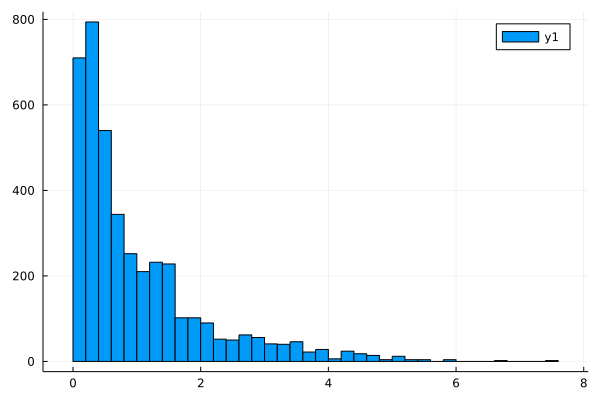

In [50]:

FU=fill(fill(0.1+im, 4,4), 11);

        
    
    for j in 1:length(FU)
      
   Ltwo=copy(kronecker(exp(im*J[j]*Z),exp(im*J[j]*Z)))
        FU[j]=CNOT*Ltwo*CNOT;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));


    A=XRow*UEven*UOdd*ZRow
    
   
 
    
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

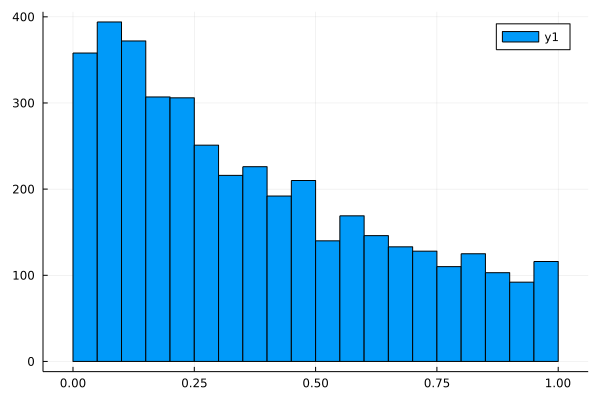

In [51]:

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n)

In [52]:
mean(n)

0.3740799701726101

In [ ]:
polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [48]:

gr();
 
#plot
histogram(n)
#save plot
Plots.savefig("fig/DTC-Kick0.3.png")

DTC

In [16]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

In [17]:
Cii=fill(0.1, 12,25);

In [53]:
At=I(4096);
for t in 1:25
   # for l in 1:12
        LM=copy(Zi[5]*At*Zi[5]);
        Cii[5,t]=real(LM[1365,1365]);
  #  end
    At=A*At;
end

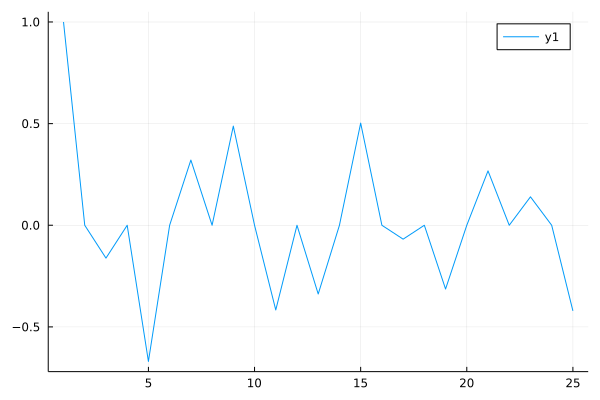

In [54]:
xax=1:25
Plots.plot(xax,Cii[5,:])

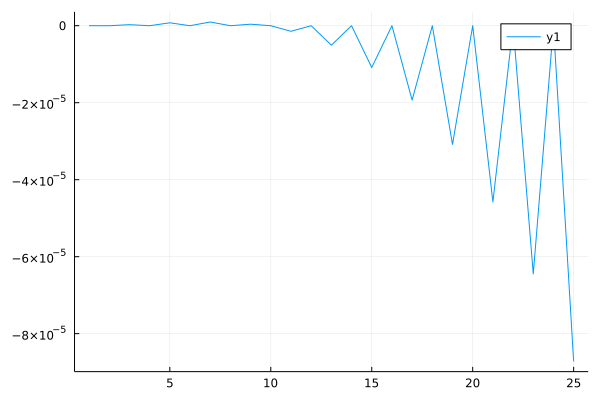

In [23]:
Plots.plot(xax,Cii[3,:])

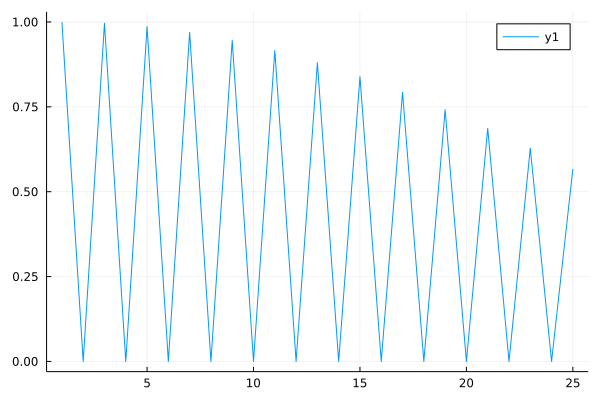

In [24]:
Plots.plot(xax,Cii[4,:])

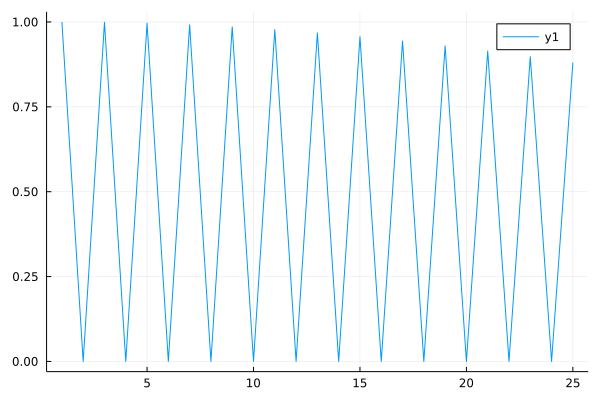

In [25]:
Plots.plot(xax,Cii[5,:])

In [34]:
eigvals(Z*RX(pi)*Z)

2-element Vector{ComplexF64}:
 1.1102230246251565e-16 - 1.0im
 1.1102230246251565e-16 + 0.9999999999999997im

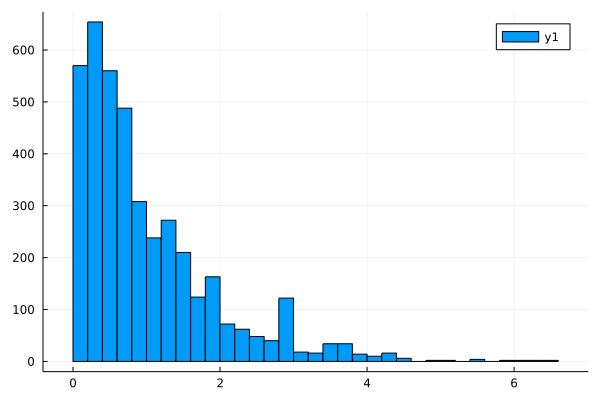

In [38]:

    A=XRow*UEven*UOdd*ZRow
    
   
 
    
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

histogram(m)

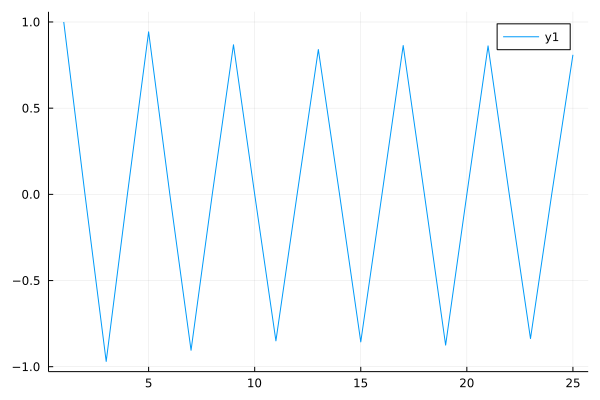

In [44]:
At=I(4096);
for t in 1:25
   # for l in 1:12
        LM=copy(Zi[5]*At*Zi[5]);
        Cii[5,t]=real(LM[1365,1365]);
  #  end
    At=A*At;
end

xax=1:25
Plots.plot(xax,Cii[5,:])

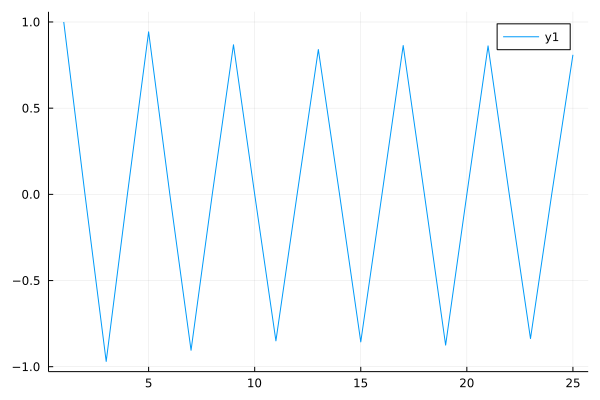

In [45]:
xax=1:25
Plots.plot(xax,Cii[5,:])